# Single Decision Tree

## Imports

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, matthews_corrcoef, confusion_matrix, classification_report, ConfusionMatrixDisplay
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils

## Import Dataset and Clean

In [ ]:
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_test

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
41804        2991      85      9                               503   
14445        3360     185     13                               566   
194721       3286     352      8                                90   
317944       2861     103     13                               607   
166561       2834      97      9                               108   
...           ...     ...    ...                               ...   
241604       2074     294     23                               384   
407181       3120     281     11                               182   
190419       3023     352      5                                 0   
60063        2858     248      5                                30   
385523       3192     105     11                               685   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
41804                               72                             5124   
14445                              102                             4468   
194721                               6                             4097   
317944                              29                              450   
166561                              13                             1184   
...                                ...                              ...   
241604                              10                              418   
407181                               0                             1679   
190419                               0                             3129   
60063                                0                             3126   
385523                              97                             2824   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
41804             233             225            124   
14445             222             249            158   
194721            206             226            158   
317944            242             222            108   
166561            236             227            122   
...               ...             ...            ...   
241604            151             228            214   
407181            189             241            192   
190419            211             231            158   
60063             209             244            173   
385523            238             227            118   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
41804                                 5501  ...            0            0   
14445                                 2561  ...            0            0   
194721                                1635  ...            0            0   
317944                                1170  ...            0            0   
166561                                1832  ...            0            0   
...                                    ...  ...          ...          ...   
241604                                1025  ...            0            0   
407181                                 825  ...            0            0   
190419                                 361  ...            0            0   
60063                                 4052  ...            0            0   
385523                                3071  ...            0            0   

        Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
41804             0            0            0            0            0   
14445             0            0            0            0            0   
194721            0            0            0            0            0   
317944            0            0            0            0            0   
166561            0            0            0            0            0   
...             ...          ...          ...          ...          ...   
241604            0            0            0            0            0   
407181            0            0            0            0          

# Decision Tree with SKLearn


In [4]:
mcc_scorer = make_scorer(matthews_corrcoef)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=34)

param_grid_tree = {"max_depth": [None, 5, 10, 20, 30, 35, 40, 45], "criterion": ["gini", "entropy"]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, scoring=mcc_scorer, cv=cv, verbose=3)
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....criterion=gini, max_depth=None;, score=0.976 total time=  50.8s
[CV 2/5] END ....criterion=gini, max_depth=None;, score=0.976 total time= 1.6min
[CV 3/5] END ....criterion=gini, max_depth=None;, score=0.976 total time= 1.3min
[CV 4/5] END ....criterion=gini, max_depth=None;, score=0.976 total time=  41.8s
[CV 5/5] END ....criterion=gini, max_depth=None;, score=0.976 total time= 1.6min
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.617 total time=  27.3s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.616 total time=  27.1s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.616 total time=  27.9s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.617 total time=   6.5s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.618 total time=  11.2s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.768 total time=  45.9s
[CV 2/5] END ......criterion=gini, max_depth=10;

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=34, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 35, 40, 45]},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=3)

In [5]:
best_tree = grid_tree.best_estimator_
best_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## Testing and Metrics

In [6]:
y_train = np.array(y_train, dtype=np.int64)
y_test = np.array(y_test, dtype=np.int64)
y_pred = best_tree.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9446313778473877


Test MCC: 0.9113298834177245

Confusion Matrix:
[[39962  2165     0     0    44     9   188]
 [ 2249 53782   172     1   268   153    36]
 [    3   113  6748    49     7   231     0]
 [    0     0    47   478     0    24     0]
 [   33   174    16     0  1669     7     0]
 [    2    71   188    27     6  3179     0]
 [  117    34     0     0     0     0  3951]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.94      0.94      0.94      7151
           4       0.86      0.87      0.87       549
           5       0.84      0.88      0.86      1899
           6       0.88      0.92      0.90      3473
           7       0.95      0.96      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.91      0.92      0.92    116203
weighted avg       0.94      0.94      0.94    116203



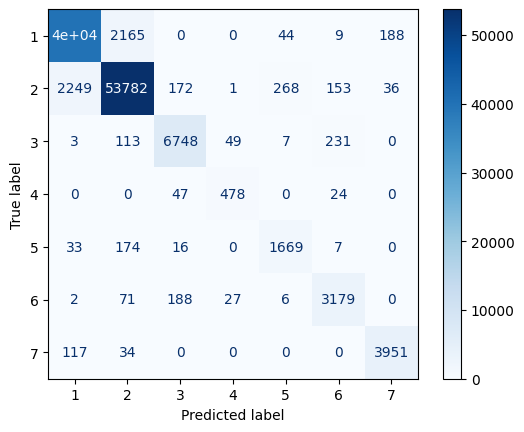

In [7]:
y_test_pred = best_tree.predict(X_test)
test_mcc = matthews_corrcoef(y_test, y_test_pred)
print("Test MCC:", test_mcc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
plt.show()

In [8]:
dump(best_tree, "../data/best_decision_tree.joblib")

['../data/best_decision_tree.joblib']

# Visualization

In [14]:
forest_names_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

y_temp = y.squeeze()
y_named = y_temp.map(forest_names_map)
class_names = list(y_named.unique())

plt.figure(figsize=(160, 80), dpi=200) 

print(class_names)
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    max_depth=2,
    fontsize=60
)

plt.show()

['Aspen', 'Lodgepole Pine', 'Spruce/Fir', 'Krummholz', 'Ponderosa Pine', 'Douglas-fir', 'Cottonwood/Willow']


In [7]:
decision_tree_model = load('../data/best_decision_tree.joblib')

In [ ]:
y_train = np.array(y_train, dtype=np.int64)
y_test = np.array(y_test, dtype=np.int64)
y_pred = decision_tree_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9446313778473877


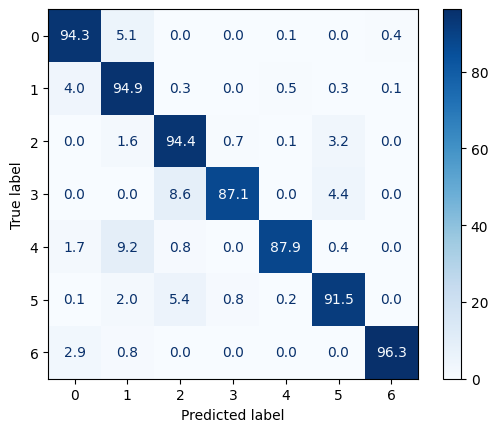

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f")